In [1]:
%run util.py

In [17]:
printTime()
## generate our own data in this block
seed = np.random.randint(1000) 
seed = 932 #(496,type 3)
print ("seed: ",seed)
np.random.seed(seed)

algo_type = 'adaboost'
root = 'generatedData/'+algo_type+"/"
(X, y ,true_w,true_b,poly) = generateData((5000,100),30,eta=0.2,noise_type=3,split=False)
# (X, y ,true_w,true_b) = generateData((5000,100),50,eta=0.25,noise_type=2,split=False)
large_w_ind = np.argsort(-true_w)
print(true_w[large_w_ind][:25],large_w_ind[:25])
print(poly)

Latest excution of this block: Sat Mar 15 07:18:32 2025
seed:  932
generated data of shape:  (5000, 100) noisy data 975 , 1 vs -1 : 2009 2991
[0.09091569 0.08374534 0.07937181 0.05024463 0.04903167 0.04858309
 0.04666262 0.0432262  0.04120198 0.03846628 0.03695076 0.03644245
 0.03535793 0.03525282 0.03469485 0.03162953 0.02963711 0.02870036
 0.02455415 0.02126313 0.02103154 0.0183787  0.01780807 0.01349619
 0.01168206] [20 10 21  8 14  0 25 13  7 26 15  2 22  9 29  5 27 16 24  1  3 28 11 17
 18]
{'coeff': array([-0.59573525,  0.12420779,  0.44170315]), 'b': 0, 'ind': [30, 31, 32]}


In [25]:
printTime()
## load public datasets in this block
algo_type = 'adaboost'
# adult, proc-diabetes,proc-bank, spambase
their_result_dataset_name = 'proc-diabetes'
root = their_result_dataset_name+'/'
datasets = {
    'adult':{'name':"./data/datasets/adult_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-5000},
    'proc-diabetes':{'name':"./data/datasets/proc-diabetes_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-1},
    'proc-bank':{'name':"./data/datasets/proc-bank_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-10000},
    'spambase':{'name':"./data/datasets/spambase_data.csv", 'ratio':0.25, 'label_map':[0,1], 'label_ind': 0,'exclude':[],'max_row':-2000}
    }
X,y = loadData(**datasets[their_result_dataset_name])

Latest excution of this block: Sat Mar 15 07:26:12 2025
--------- dataset summary: ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    float64
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
None
(768, 8) (768,)
[[6.0000000e+00 1.4800000e+02 7.2000000e+01 3.5000000e+01 0.0000000e+00
  3.3599998e+01 6.2700000e-01 5.0000000e+01]
 [1.0000000e+00 8.5000000e+01 6.6000000e+01 2.9000000e+01 0.0000000e+00
  2.6600000e+01 3.5100000e-01 3.1000000e+01]
 [8.0000000e+00 1.8300000e+02 6.4000000e+01 0.0000000e+00 0.0000000e+00
  2.3299999e+01 6.7200000e-0

In [9]:
# this block grid search for best blackbox params
printTime()
seed = 932 #(186,226,type 3)
print ("seed: ",seed)
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=seed)

# param_grid = {'learning_rate': [0.01,0.05,0.1], 
#               'n_estimators': [100,250],
#               'max_depth':[3,5,7]
#              }
# grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3) 


# param_grid = {
#     'hidden_layer_sizes': [(10,10,10),(20,100,20),(10,10),(50,50,5)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam','lbfgs'],
#     'alpha': [0.0001,0.0002, 0.05],
# }
# grid = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3) 

# param_grid = {'C': [0.2, 0.5, 1.0, 2.0, 5.0], 
#               'kernel': ['linear','rbf'],
#               'gamma':['scale','auto',0.0001,0.0005,0.01]
#              }
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 


# # fitting the model for grid search 
grid.fit(X_train, y_train) 
y_pred_grid = grid.predict(X_test) 
print("Error:",1.0-metrics.accuracy_score(y_test, y_pred_grid))
print(grid.best_params_) 





Latest excution of this block: Sat Mar  8 11:40:19 2025
seed:  932
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd;, score=0.808 total time=   0.5s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd;, score=0.793 total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd;, score=0.784 total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd;, score=0.795 total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd;, score=0.824 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam;, score=0.817 total time=   0.5s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam;, score=0.820 total time=   0.5s
[CV 3/5] END activatio

In [18]:
# # this block tests saved best black-box param from the previous block
# # generated data
bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
blackbox = SVC(**bb_params)

# # adult
# bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
# blackbox = GradientBoostingClassifier(**bb_params)

# # proc-diabetes
# params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'}
# blackbox = SVC(**params)

# # spambase
# bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
# blackbox = GradientBoostingClassifier(**bb_params)

# # bank
# bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
# blackbox = GradientBoostingClassifier(**bb_params)

folds = KFold(n_splits= 4,shuffle=True,random_state=42)
scores = []
for j, (train_index, test_index) in enumerate(folds.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    blackbox.fit(X_train, y_train) 
    y_pred_bb = blackbox.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred_bb))
print("%0.3f \pm %0.3f" % (1.0-np.mean(scores), np.std(scores)))

0.147 \pm 0.005


In [19]:
def eachFold(X_train,y_train,X_test,y_test,k,theta,algo='adaboost',blackbox = SVC(), verbose=1):
    # train a full classifier using 'algo' and 100 decision stumps
    if (algo=='roboost'):
        f = roBoost(X_train,y_train,100,0.3,verbose = 1,r_lb=0.03)
    else:
        f = adaBoost(X_train,y_train,100) # 50 for diabetes
    
    # sample k out of the full classifier abf
    beta =0.99/k
    g = deRandomizeSampleHypotheses(f,k,X_train,y_train,beta,verbose = 0)
    
    #blackbox = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,25,5), random_state=1)
    blackbox.fit(X_train, y_train)
    
    # plot_margin_distribution(X_test,y_test,g,theta,name='g')
    error_cover_margin = compute_error_ERROR_cover_margin(X_train,y_train,X_test,y_test,g,k,theta,blackbox) # (7,k+1) eEc_eEc_m

    
    y_pred_bb = blackbox.predict(X_test) 
    error_bb = 1 - metrics.accuracy_score(y_test, y_pred_bb)
    
    stats = []
    (ind,c) = cover(g,X_test,theta)
    e = marginError(X_test[ind],y_test[ind],g,0)
    error_f = marginError(X_test,y_test,f)

    mask = np.ones(y_test.shape[0], dtype=bool)
    mask[ind] = False
    u_ind = np.arange(y_test.shape[0])[mask]

    if u_ind.shape[0]>0:
        E = 1 - metrics.accuracy_score(y_test[u_ind], y_pred_bb[u_ind])
    else:
        E = 0
    ERROR = (e*ind.shape[0]+E*u_ind.shape[0])/y_test.shape[0]
    
    stats = [c,e,error_bb,error_f,ERROR,E] # coverage, error on covered, error bb only, error f only, ERROR of pipeline, error on uncovered

    if algo=='adaboost':
        theta_c = 1.1*theta
        theta_b = 0
        c_theta = 1 - marginError(X_train,y_train,f,theta_c) #- np.exp(-k/8.0*(theta_c-theta)**2)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    else:
        nu = 0.3
        rho = 1.0
        theta_b = 0
        c_theta = 1 - nu #- np.exp(-k/32.0)
        b_theta = (marginError(X_train,y_train,f,theta_b))/c_theta
    stats.append(c_theta)
    stats.append(b_theta)
    
    if verbose>0:
        printClassifierFeatures(g,print_weights=False)
        # print("compare to top feature in true w")
        # print(large_w_ind[:k])
        # print(true_w[large_w_ind][:k])
        # print ("P_S[y * f(x) < 0] = ",marginError(X_train,y_train,f))
        # print ("P_S[y * g(x) < 0] = ",marginError(X_train,y_train,g))
        
        print ("P_D[y * f(x) < 0] = ",marginError(X_test,y_test,f))
        print ("P_D[y * g(x) < 0] = ",marginError(X_test,y_test,g))
        print("coverage at theta  = ", theta, "is", c, " = % of test data st. |g(x)| >= theta")
        print ("P_D[y * g(x) < 0 | cover] = ", e)
        
        # theta_c = 1.1*theta
        # theta_b = 0#-theta/5.0
        # print ("P_S[y * f(x) < theta_c] = ",marginError(X_train,y_train,f,theta_c))
        
        print ("tighter c_theta: 1-P_S[y * f(x) < theta_c] = ",c_theta)
        print("tighter b_theta: ",b_theta)
        
           

    return (error_cover_margin,stats)

Latest excution of this block: Sat Mar 15 07:19:55 2025
Sparsify adaboost to  9 base learners:
Fold 0:
----------------- classifier summary -----------------
[20, 10, 21, 8, 14, 0, 25, 14, 7]
P_D[y * f(x) < 0] =  0.1872
P_D[y * g(x) < 0] =  0.252
coverage at theta  =  0.2222222222222222 is 0.5064  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.12954186413902052
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.21573333333333333
tighter b_theta:  0.8393077873918418
Fold 1:
----------------- classifier summary -----------------
[20, 10, 21, 8, 14, 0, 25, 14, 7]
P_D[y * f(x) < 0] =  0.1856
P_D[y * g(x) < 0] =  0.2216
coverage at theta  =  0.2222222222222222 is 0.5232  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.09938837920489296
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.18186666666666662
tighter b_theta:  0.9985337243401763
Fold 2:
----------------- classifier summary -----------------
[20, 10, 21, 8, 0, 14, 14, 25, 7]
P_D[y * f(x) < 0] =  

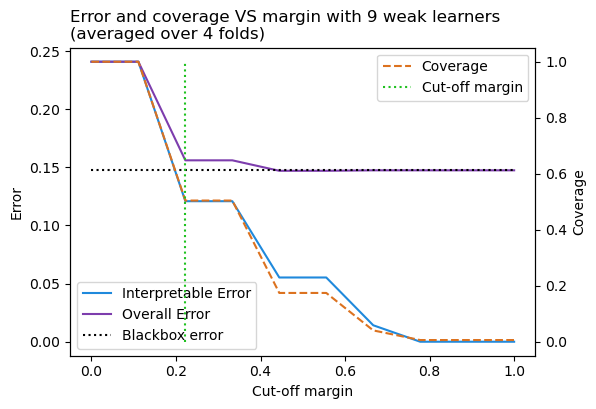

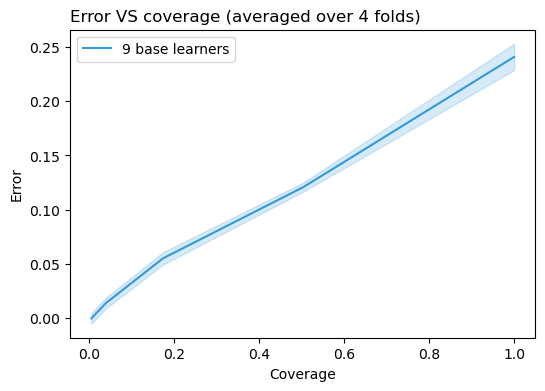

Sparsify adaboost to 15 base learners:
Fold 0:
----------------- classifier summary -----------------
[20, 10, 21, 8, 20, 14, 0, 10, 13, 25, 7, 22, 14, 29, 9]
P_D[y * f(x) < 0] =  0.1872
P_D[y * g(x) < 0] =  0.2184
coverage at theta  =  0.13333333333333333 is 0.644  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.12919254658385093
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.45466666666666666
tighter b_theta:  0.3982404692082111
Fold 1:
----------------- classifier summary -----------------
[20, 10, 21, 20, 8, 14, 0, 22, 25, 7, 2, 13, 14, 9, 15]
P_D[y * f(x) < 0] =  0.1856
P_D[y * g(x) < 0] =  0.2128
coverage at theta  =  0.13333333333333333 is 0.6432  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.10945273631840796
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.4210666666666667
tighter b_theta:  0.4312856238125396
Fold 2:
----------------- classifier summary -----------------
[20, 10, 21, 8, 0, 14, 25, 7, 20, 13, 2, 22, 14, 9, 10]
P_D[y * f

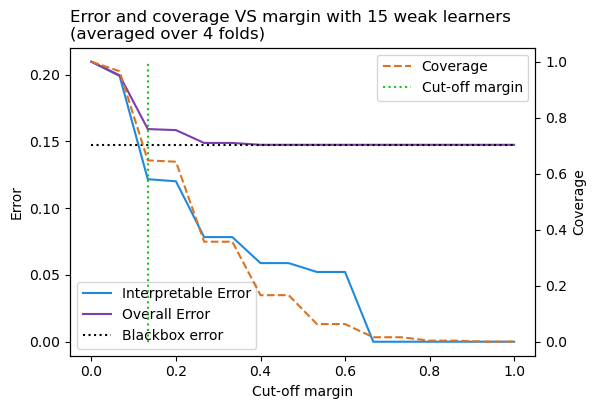

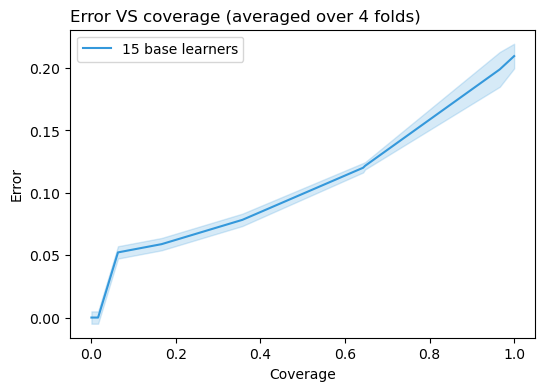

Sparsify adaboost to 21 base learners:
Fold 0:
----------------- classifier summary -----------------
[20, 10, 21, 20, 8, 14, 0, 10, 25, 7, 13, 26, 22, 21, 2, 9, 29, 14, 5, 16, 15]
P_D[y * f(x) < 0] =  0.1872
P_D[y * g(x) < 0] =  0.1688
coverage at theta  =  0.09523809523809523 is 0.6864  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.0944055944055944
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.5786666666666667
tighter b_theta:  0.3129032258064516
Fold 1:
----------------- classifier summary -----------------
[20, 10, 21, 20, 8, 14, 0, 22, 25, 7, 2, 21, 13, 10, 15, 29, 26, 9, 5, 16, 27]
P_D[y * f(x) < 0] =  0.1856
P_D[y * g(x) < 0] =  0.1544
coverage at theta  =  0.09523809523809523 is 0.6928  = % of test data st. |g(x)| >= theta
P_D[y * g(x) < 0 | cover] =  0.10392609699769054
tighter c_theta: 1-P_S[y * f(x) < theta_c] =  0.5509333333333333
tighter b_theta:  0.3296224588576961
Fold 2:
----------------- classifier summary -----------------
[20, 10, 21, 8, 0, 20

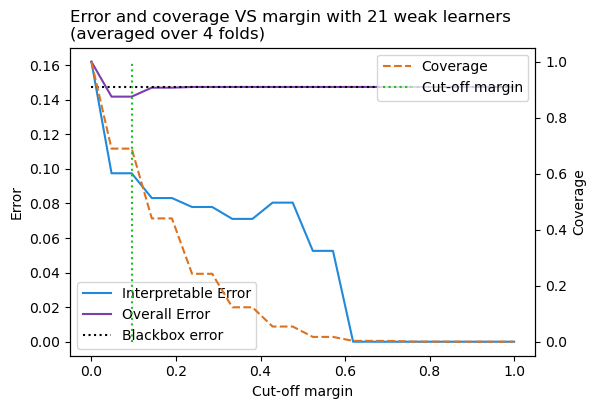

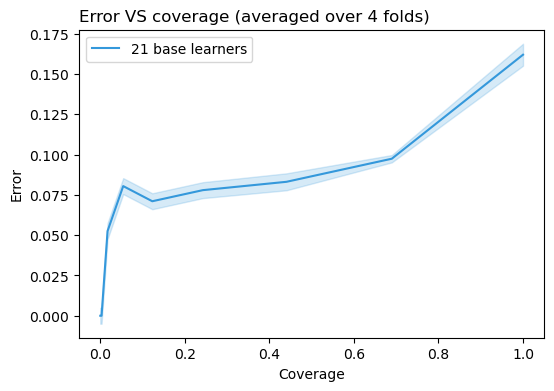

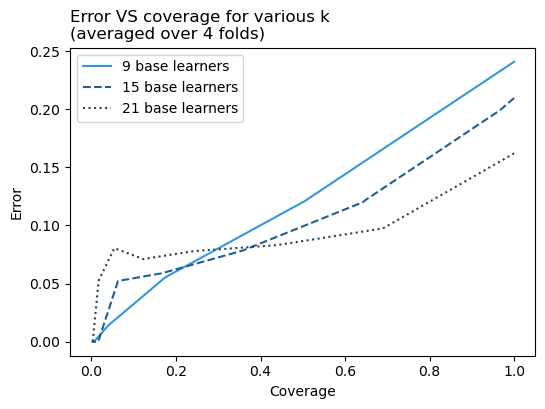

In [21]:
printTime()

n_folds = 4  # 4 for generated data, 10 for public datasets
kf = KFold(n_splits= n_folds,shuffle=True,random_state=42)

# # saved k and theta values
# # generated data
k_list = [9,15,21]
theta_list = [2.0/9,2.0/15,2.0/21]

# # adult 21 rules
# k_list=[9,15,21]
# theta_list = [2.0/9,2.0/15,2.0/21]

# # proc-diabetes 4 rules
# k_list=[9,11,13]
# theta_list = [2.0/9,2.0/11,2.0/13]

# # spambase 20 rules
# k_list=[9,13,17]
# theta_list = [2.0/9,2.0/13,2.0/17]

# # bank_2 14 rules
# k_list=[9,11,13]
# theta_list = [2.0/9,2.0/11,2.0/13]

compare_by_k = []

df = pd.DataFrame([], columns= ['k','margin','train_error_mean','train_error_std','train_ERROR_mean','train_ERROR_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_ERROR_mean','test_ERROR_std','test_cover_mean','test_cover_std'])

for i in range(len(k_list)):
    k = k_list[i]
    theta = theta_list[i]
    error_cover_margin_k = [] # list of data for this k, len() is n_folds
    
    print("Sparsify {1} to {0:2d} base learners:".format(k,algo_type))
    stats_arr = np.zeros((n_folds,6+2)) #stats cols: c,e,error_bb,error_f,ERROR, E, c_theta, b_theta
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {j}:")
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]
        
        ####################################################
        ## saved best black-box parameters for each dataset
        # # generated data
        bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'} #svc
        blackbox = SVC(**bb_params)

        # adult
        # bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
        # blackbox = GradientBoostingClassifier(**bb_params)

        # # proc-diabetes
        # bb_params = {'C': 5.0, 'gamma': 'scale', 'kernel': 'linear'} #svc
        # blackbox = SVC(**bb_params)
        
        # # spambase
        # bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250} #{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
        # blackbox = GradientBoostingClassifier(**bb_params)

        # # bank
        # bb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
        # blackbox = GradientBoostingClassifier(**bb_params)
        
        #(7,k+1)
        error_cover_margin_fold,stats = eachFold(X_train,y_train,X_test,y_test,k,theta,algo_type,blackbox,verbose=1) 
        
        error_cover_margin_k.append(error_cover_margin_fold)
        stats_arr[j] = np.array(stats)
        
    print("------------------------------ {0:2d} base learners cut-off margin {2:3f} averaged over {1:2d} folds ------------------------------".format(k,n_folds,theta))
    stats_mean = np.mean(stats_arr,axis=0)
    stats_std = np.std(stats_arr,axis=0)
    # 0 coverage, 1 error on covered, 2 error bb only, 3 error f only, 4 ERROR of pipeline, 5 c_theta, 6 b_theta
    print ("coverage: {0:.3f} \pm {1:.3f}\t error on covered: {2:.3f} \pm {3:.3f}\t blackbox (overall): {4:.3f} \pm {5:.3f}\t f (overall): {6:.3f} \pm {7:.3f}\t ERROR (pipeline): {8:.3f} \pm {9:.3f}\t error (uncovered): {10:.3f} \pm {11:.3f}".format(stats_mean[0],stats_std[0],stats_mean[1],stats_std[1],stats_mean[2],stats_std[2],stats_mean[3],stats_std[3],stats_mean[4],stats_std[4],stats_mean[5],stats_std[5]))
    
    # print ("c_theta: {0:.3f} \pm {1:.3f}\t b_theta: {2:.3f} \pm {3:.3f}".format(stats_mean[6],stats_std[6],stats_mean[7],stats_std[7]))

    
# ['k',  0
# 'margin', 1
# 'train_error_mean', 2
# 'train_error_std', 3
# 'train_ERROR_mean', 4
# 'train_ERROR_std', 5
# 'train_cover_mean', 6
# 'train_cover_std', 7
# 'test_error_mean', 8
# 'test_error_std', 9
# 'test_ERROR_mean', 10
# 'test_ERROR_std', 11
# 'test_cover_mean', 12
# 'test_cover_std'] 13

#error_cover_margin: eEc_eEc_m
    # aggregate data for this k, append to df
    error_cover_margin_k = np.array(error_cover_margin_k) # (n_folds, 7, k+1)
    k_m_ee_cc = np.zeros((error_cover_margin_k.shape[2],14))
    k_m_ee_cc[:,0] = k
    k_m_ee_cc[:,1] = error_cover_margin_k[0,6,:] # margin values
    
    k_m_ee_cc[:,2] = np.mean(error_cover_margin_k[:,0,:],axis=0) # train error mean across folds
    k_m_ee_cc[:,3] = np.std(error_cover_margin_k[:,0,:],axis=0)  # train error std across folds
    k_m_ee_cc[:,4] = np.mean(error_cover_margin_k[:,1,:],axis=0) # train ERROR mean across folds
    k_m_ee_cc[:,5] = np.std(error_cover_margin_k[:,1,:],axis=0)  # train ERROR std across folds
    k_m_ee_cc[:,6] = np.mean(error_cover_margin_k[:,2,:],axis=0) # train cover mean across folds
    k_m_ee_cc[:,7] = np.std(error_cover_margin_k[:,2,:],axis=0)  # train cover std across folds
    
    k_m_ee_cc[:,8] = np.mean(error_cover_margin_k[:,3,:],axis=0) # test error mean across folds
    k_m_ee_cc[:,9] = np.std(error_cover_margin_k[:,3,:],axis=0)  # test error std across folds
    k_m_ee_cc[:,10] = np.mean(error_cover_margin_k[:,4,:],axis=0) # test ERROR mean across folds
    k_m_ee_cc[:,11] = np.std(error_cover_margin_k[:,4,:],axis=0)  # test ERROR std across folds
    k_m_ee_cc[:,12] = np.mean(error_cover_margin_k[:,5,:],axis=0) # test cover mean across folds
    k_m_ee_cc[:,13] = np.std(error_cover_margin_k[:,5,:],axis=0)  # test cover std across folds

    df_k = pd.DataFrame(k_m_ee_cc, columns= ['k','margin','train_error_mean','train_error_std','train_ERROR_mean','train_ERROR_std','train_cover_mean','train_cover_std','test_error_mean','test_error_std','test_ERROR_mean','test_ERROR_std','test_cover_mean','test_cover_std'])
    df = pd.concat([df, df_k], ignore_index=True)

    # k_m_ee_cc_small = k_m_ee_cc[:,[0,1,2,3,6,7,8,9,12,13]]
    # compare_by_k.append(k_m_ee_cc_small)
    compare_by_k.append(k_m_ee_cc)
    
    plot_ERROR_cover_by_margin(k_m_ee_cc,ref_theta=theta,ref_error=stats_arr[:,2],title="Error and coverage VS margin with "+str(k)+" weak learners \n(averaged over "+str(n_folds)+" folds)",file_name=root+'error_cover_margin_'+str(k))
    plot_error_by_cover([k_m_ee_cc],labels=[str(k)+' base learners'],title="Error VS coverage (averaged over "+str(n_folds)+" folds)",file_name=root+'error_cover_'+str(k))
        
df['k'] = df['k'].astype(int)
df.to_csv('output/'+root+"train_test_stats"+'.csv', index=False) 
plot_error_by_cover(compare_by_k,labels=[str(k)+' base learners' for k in k_list],band=False,title="Error VS coverage for various k \n(averaged over "+str(n_folds)+" folds)", file_name=root+'error_cover_multi') #, file_name='diabetes/error_cover_multi'
# ab = error_list_k # save the data from adaBoost for comparison against roboost